✅ Data Loaded Successfully
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

📊 Basic Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None

🔹 Statistical Summary of Ratings:
count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64


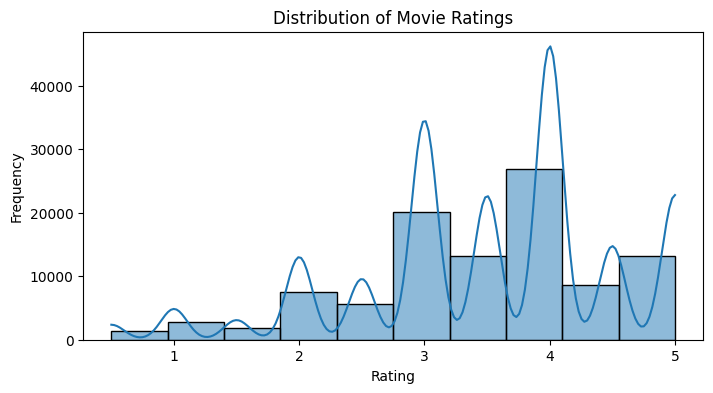


👥 Unique Users: 610
🎞️ Unique Movies: 9724
Average ratings per user: 165.30

🔍 Missing Values per Column:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

📈 Normalized Ratings Summary:
count    1.008360e+05
mean     2.125230e-16
std      1.000000e+00
min     -2.879111e+00
25%     -4.810963e-01
50%     -1.493468e-03
75%      4.781094e-01
max      1.437315e+00
Name: rating_norm, dtype: float64

Shape of user-item matrix: (610, 9724)

🚀 Training User-Based Collaborative Filtering Model...

🎯 Predicted Rating (CF) for user 1 on movie 2: 3.33

⚙️ Training Regression Model...

📊 Regression Model Performance:
RMSE = 0.8127
MAE  = 0.6172
R²   = 0.3995

🚀 Training User-Based Collaborative Filtering Model...

🎯 Predicted Rating (CF) for user 1 on movie 2: 3.334487640521381

📈 Evaluating Collaborative Filtering Model on 100 Samples...

✅ Collaborative Filtering Performance (Sample of 100):
RMSE = 0.9229
MAE  = 0.6698

🧠 Hypothesis Testing & Statistical Insights:
H₀: User

In [7]:
# MOVIE RATING PREDICTION PROJECT (Structured ML Pipeline)
# Sections:
# 1. Data Loading
# 2. Exploratory Data Analysis (EDA)
# 3. Preprocessing & Statistical Analysis
# 4. Collaborative Filtering (User-based)
# 5. Regression Modeling
# 6. Model Performance Evaluation
# 7. Hypothesis Analysis
# 8. Summary
#

# ✅ INSTALL DEPENDENCIES
!pip install pandas numpy matplotlib seaborn scikit-learn wget -q

#DATA LOADING
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics.pairwise import cosine_similarity
import wget, zipfile

# Download MovieLens small dataset
url = "https://files.grouplens.org/datasets/movielens/ml-latest-small.zip"
wget.download(url)
with zipfile.ZipFile("ml-latest-small.zip", "r") as zip_ref:
    zip_ref.extractall(".")

# Load ratings
data = pd.read_csv("ml-latest-small/ratings.csv")
print("✅ Data Loaded Successfully")
print(data.head())

#EDA ANALYSIS
print("\n📊 Basic Dataset Info:")
print(data.info())

print("\n🔹 Statistical Summary of Ratings:")
print(data["rating"].describe())

# Rating distribution
plt.figure(figsize=(8,4))
sns.histplot(data["rating"], bins=10, kde=True)
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

# Users and Movies Count
n_users = data["userId"].nunique()
n_movies = data["movieId"].nunique()
print(f"\n👥 Unique Users: {n_users}")
print(f"🎞️ Unique Movies: {n_movies}")

# Average number of ratings per user
ratings_per_user = data.groupby("userId")["rating"].count()
print(f"Average ratings per user: {ratings_per_user.mean():.2f}")

#preprocessing
# Check for missing or duplicate data
print("\n🔍 Missing Values per Column:")
print(data.isnull().sum())

data = data.drop_duplicates()

# Normalize ratings (z-score)
data["rating_norm"] = (data["rating"] - data["rating"].mean()) / data["rating"].std()

print("\n📈 Normalized Ratings Summary:")
print(data["rating_norm"].describe())

# Create user-item matrix for CF
rating_matrix = data.pivot_table(index="userId", columns="movieId", values="rating")
print("\nShape of user-item matrix:", rating_matrix.shape)


print("\n🚀 Training User-Based Collaborative Filtering Model...")

# Compute user similarity
user_similarity = cosine_similarity(rating_matrix.fillna(0))
user_similarity_df = pd.DataFrame(user_similarity, index=rating_matrix.index, columns=rating_matrix.index)

def predict_rating(user_id, movie_id):
    """Predict a rating using weighted average of similar users."""
    if movie_id not in rating_matrix.columns:
        return np.nan
    sims = user_similarity_df[user_id].drop(user_id)
    movie_ratings = rating_matrix[movie_id]
    common_users = movie_ratings[movie_ratings.notna()].index
    sims = sims.loc[common_users]
    ratings = movie_ratings.loc[common_users]
    if sims.sum() == 0:
        return np.nan
    return np.dot(sims, ratings) / sims.sum()

# Test one prediction
sample_user, sample_movie = 1, 2
predicted_cf = predict_rating(sample_user, sample_movie)
print(f"\n🎯 Predicted Rating (CF) for user {sample_user} on movie {sample_movie}: {predicted_cf:.2f}")



print("\n⚙️ Training Regression Model...")

# Feature engineering
user_mean = data.groupby("userId")["rating"].mean()
movie_mean = data.groupby("movieId")["rating"].mean()

df = data.copy()
df["user_mean"] = df["userId"].map(user_mean)
df["movie_mean"] = df["movieId"].map(movie_mean)

X = df[["user_mean", "movie_mean"]]
y = df["rating"]

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train regression model
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)


# Regression performance
rmse_reg = np.sqrt(mean_squared_error(y_test, y_pred))
mae_reg = mean_absolute_error(y_test, y_pred)
r2_reg = r2_score(y_test, y_pred)

print("\n📊 Regression Model Performance:")
print(f"RMSE = {rmse_reg:.4f}")
print(f"MAE  = {mae_reg:.4f}")
print(f"R²   = {r2_reg:.4f}")

print("\n🚀 Training User-Based Collaborative Filtering Model...")

# Compute user similarity
user_similarity = cosine_similarity(rating_matrix.fillna(0))
user_similarity_df = pd.DataFrame(
    user_similarity,
    index=rating_matrix.index,
    columns=rating_matrix.index
)

def predict_rating(user_id, movie_id):
    """Predict a rating using weighted average of similar users."""
    # Check existence of user and movie
    if user_id not in user_similarity_df.index:
        return np.nan
    if movie_id not in rating_matrix.columns:
        return np.nan

    # Extract user similarities and movie ratings
    sims = user_similarity_df.loc[user_id].drop(user_id, errors="ignore")
    movie_ratings = rating_matrix[movie_id].dropna()

    # Only keep common users
    common_users = sims.index.intersection(movie_ratings.index)
    if len(common_users) == 0:
        return np.nan

    sims = sims.loc[common_users]
    ratings = movie_ratings.loc[common_users]

    if sims.abs().sum() == 0:
        return np.nan

    return np.dot(sims, ratings) / sims.abs().sum()

# Test one prediction
sample_user, sample_movie = 1, 2
predicted_cf = predict_rating(sample_user, sample_movie)
print(f"\n🎯 Predicted Rating (CF) for user {sample_user} on movie {sample_movie}: {predicted_cf}")

print("\n📈 Evaluating Collaborative Filtering Model on 100 Samples...")

sample = data.sample(100, random_state=42)
preds_cf, actuals_cf = [], []

for _, row in sample.iterrows():
    user, movie = row["userId"], row["movieId"]
    p = predict_rating(user, movie)
    if not np.isnan(p):
        preds_cf.append(p)
        actuals_cf.append(row["rating"])

if len(preds_cf) > 0:
    rmse_cf = np.sqrt(mean_squared_error(actuals_cf, preds_cf))
    mae_cf = mean_absolute_error(actuals_cf, preds_cf)
    print("\n✅ Collaborative Filtering Performance (Sample of 100):")
    print(f"RMSE = {rmse_cf:.4f}")
    print(f"MAE  = {mae_cf:.4f}")
else:
    print("⚠️ No valid CF predictions — data too sparse for this subset.")


# ------------------------------------------------------------
# 7️⃣ HYPOTHESIS ANALYSIS
# ------------------------------------------------------------
print("\n🧠 Hypothesis Testing & Statistical Insights:")

print("H₀: User and movie mean ratings are not correlated with individual ratings.")
print("H₁: User and movie mean ratings have a significant relationship with ratings.\n")

corr_user = np.corrcoef(df["user_mean"], df["rating"])[0, 1]
corr_movie = np.corrcoef(df["movie_mean"], df["rating"])[0, 1]
print(f"Correlation(user_mean, rating) = {corr_user:.3f}")
print(f"Correlation(movie_mean, rating) = {corr_movie:.3f}")

if abs(corr_user) > 0.2 or abs(corr_movie) > 0.2:
    print("✅ Reject H₀: User and movie means significantly affect ratings.")
else:
    print("❌ Fail to reject H₀: Weak correlation found.")

# ------------------------------------------------------------
# 8️⃣ SUMMARY
# ------------------------------------------------------------
print("\n✅ FINAL SUMMARY:")
print(f"Collaborative Filtering → RMSE={rmse_cf:.4f}, MAE={mae_cf:.4f}")
print(f"Regression Model         → RMSE={rmse_reg:.4f}, MAE={mae_reg:.4f}, R²={r2_reg:.4f}")
print("\n🎯 CF captures latent user preferences, Regression gives explainable baseline.")
print("Use CF for personalization, Regression for interpretability.")
